# Visualization of 3D volume transformations


This notebook presents the augmentations usually applied to 3D medical imaging:

- Random crop with resizing
- Random blur
- Random gaussian noise
- Random cutout
- Random flip

## Load the OpenBHB dataset

In [ ]:
from nidl.datasets.openbhb import OpenBHB

dataset = OpenBHB("/neurospin/hc/openBHB", modality="quasiraw", split="train")

## Visualize the 3D transformation

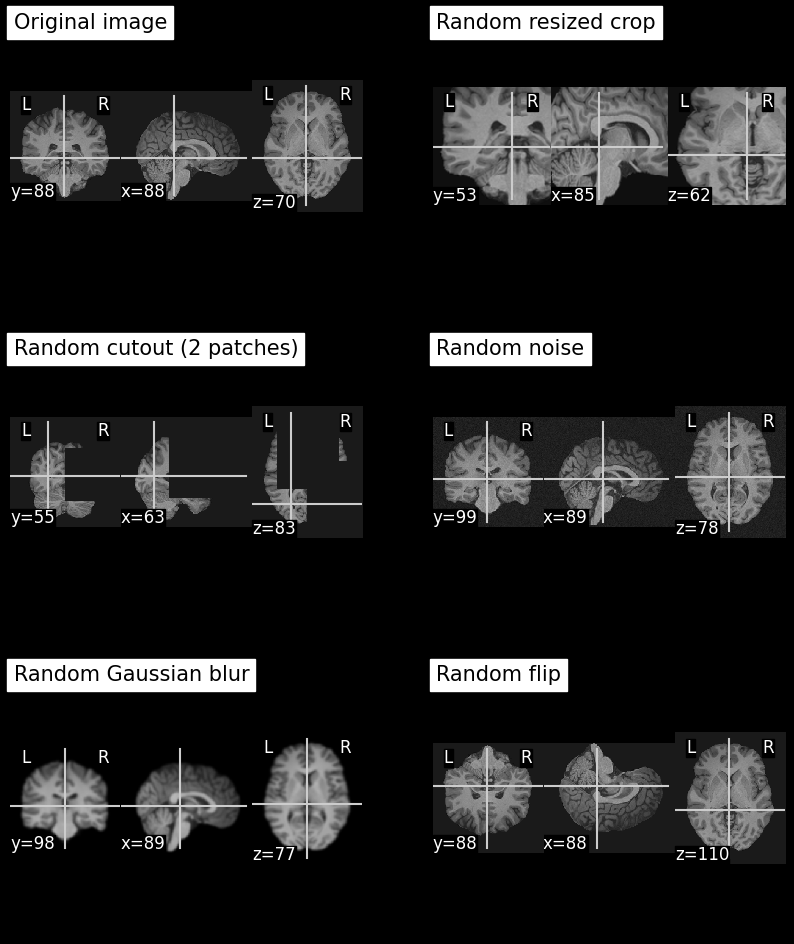

In [ ]:
import nibabel
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np
from nidl.transform import Compose
from nidl.volume.transforms import RandomBlur, RandomNoise, ZNormalization
from nidl.volume.transforms import RandomCutout, RandomFlip, RandomResizedCrop

# Load the first image
img = dataset[0][0]

# Apply the transformation
tf_crop = RandomResizedCrop(size=(128, 128, 128), scale=(0.1, 0.15))
tf_cutout = RandomCutout(scale=(0.05, 0.1), num_iterations=2)
tf_noise = Compose((ZNormalization(), RandomNoise(std=(0.1, 1.0))))
tf_blur = RandomBlur(std=(1.5, 2.0))
tf_flip = RandomFlip(axes=(1, 2))

nii_original = nibabel.Nifti1Image(img[0], affine=np.eye(4))
nii_crop = nibabel.Nifti1Image(tf_crop(img)[0], affine=np.eye(4))
nii_cutout = nibabel.Nifti1Image(tf_cutout(img)[0], affine=np.eye(4))
nii_noise = nibabel.Nifti1Image(tf_noise(img)[0], affine=np.eye(4))
nii_blur = nibabel.Nifti1Image(tf_blur(img)[0], affine=np.eye(4))
nii_flip = nibabel.Nifti1Image(tf_flip(img)[0], affine=np.eye(4))

# Visualize with nilearn
fig, axes = plt.subplots(3, 2, figsize=(2*5, 3*4))
fig.patch.set_facecolor('black')
plotting.plot_anat(nii_original, title="Original image", axes=axes[0, 0])
plotting.plot_anat(nii_crop, title="Random resized crop", axes=axes[0, 1])
plotting.plot_anat(nii_cutout, title="Random cutout (2 patches)", axes=axes[1, 0])
plotting.plot_anat(nii_noise, title="Random noise", axes=axes[1, 1])
plotting.plot_anat(nii_blur, title="Random Gaussian blur", axes=axes[2, 0])
plotting.plot_anat(nii_flip, title="Random flip", axes=axes[2, 1])